# Churn EDA Notebook
Exploratory Data Analysis for Milestone 1 Project

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


In [2]:

# Load the sample finalized dataset
df = pd.read_csv('finalized_churn_dataset.csv', parse_dates=['signup_date'])
df.head()


,customer_id,signup_date,tenure_days,total_orders,lifetime_value,avg_order_value,days_since_last_order,tickets_90d,avg_resolution,plan_type,engagement_score,churn_flag
0,1001,2021-08-23,1226,14,987.95,70.567857,62,1,22.0,Gold,3.64,0
1,1002,2020-09-24,1559,7,823.80,117.685714,216,3,8.5,Gold,1.77,1
2,1003,2022-05-16,960,8,362.93,45.366250,293,4,33.4,Premium,1.48,1
3,1004,2021-03-08,1394,9,1479.56,164.395556,99,2,16.5,Basic,2.41,1
4,1005,2021-08-19,1230,11,367.61,33.419091,172,0,30.6,Basic,6.40,1


In [3]:

# Basic dataset info
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            20 non-null     int64         
 1   signup_date            20 non-null     datetime64[ns]
 2   tenure_days            20 non-null     int64         
 3   total_orders           20 non-null     int64         
 4   lifetime_value         20 non-null     float64       
 5   avg_order_value        20 non-null     float64       
 6   days_since_last_order  20 non-null     int64         
 7   tickets_90d            20 non-null     int64         
 8   avg_resolution         20 non-null     float64       
 9   plan_type              20 non-null     object        
 10  engagement_score       20 non-null     float64       
 11  churn_flag             20 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage

,customer_id,signup_date,tenure_days,total_orders,lifetime_value,avg_order_value,days_since_last_order,tickets_90d,avg_resolution,plan_type,engagement_score,churn_flag
count,20.00000,20,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20,20.000000,20.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basic,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN
mean,1010.50000,2021-12-11 22:48:00,1115.050000,8.85000,865.531500,103.308434,192.750000,2.700000,28.715000,NaN,2.462500,0.800000
min,1001.00000,2020-01-03 00:00:00,187.000000,3.00000,230.930000,20.993636,5.000000,0.000000,1.000000,NaN,1.470000,0.000000
25%,1005.75000,2020-11-10 06:00:00,861.500000,7.00000,395.030000,44.238687,100.500000,2.000000,19.200000,NaN,1.607500,1.000000
50%,1010.50000,2021-08-24 12:00:00,1224.500000,8.50000,769.925000,101.104732,215.000000,3.000000,25.000000,NaN,1.945000,1.000000
75%,1015.25000,2022-08-22 12:00:00,1511.750000,11.00000,1253.292500,158.872250,263.500000,4.000000,36.275000,NaN,2.597500,1.000000
max,1020.00000,2024-06-27 00:00:00,1824.000000,14.00000,1834.610000,197.640000,360.000000,4.000000,65.400000,NaN,6.400000,1.000000


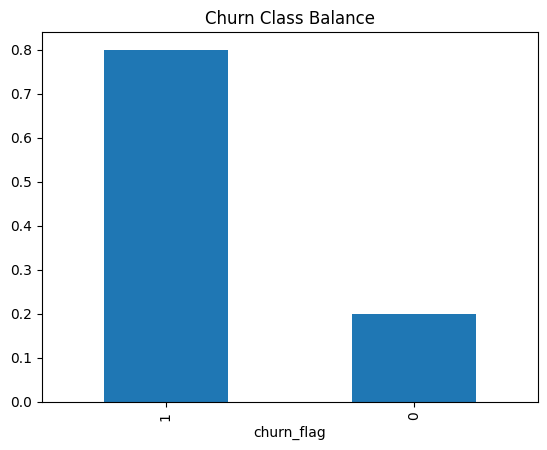

In [4]:

# Churn class balance
df['churn_flag'].value_counts(normalize=True).plot(kind='bar', title='Churn Class Balance')
plt.show()


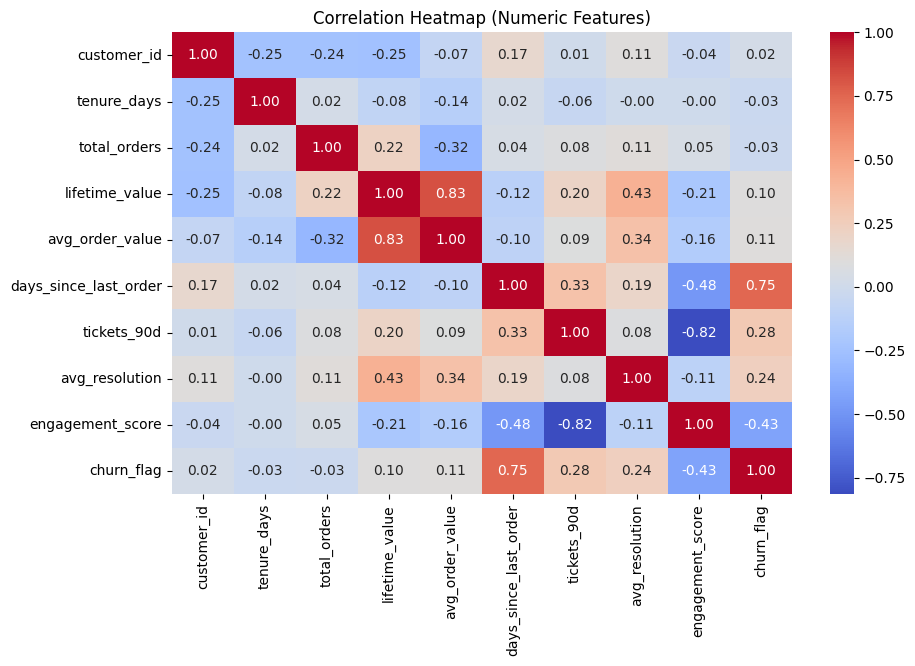

In [5]:
# Correlation heatmap (only numeric features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


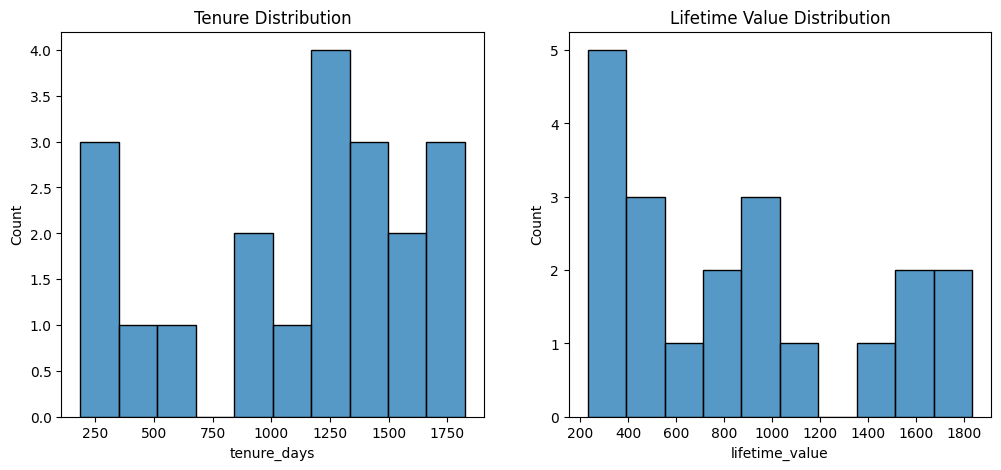

In [6]:

# Distribution of tenure_days and lifetime_value
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['tenure_days'], bins=10, ax=axes[0])
axes[0].set_title("Tenure Distribution")

sns.histplot(df['lifetime_value'], bins=10, ax=axes[1])
axes[1].set_title("Lifetime Value Distribution")
plt.show()


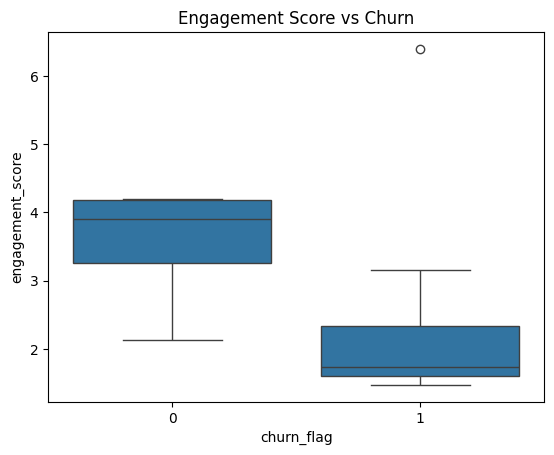

In [7]:

# Relationship between engagement_score and churn_flag
sns.boxplot(x='churn_flag', y='engagement_score', data=df)
plt.title("Engagement Score vs Churn")
plt.show()
